# 영상입력 다중클래스분류모델
### 활용 분야
- 동양인 얼굴 사진으로 한국인, 일본인, 중국인 구분
- 현미경 촬영 영상으로부터 다양한 균 구분
- 스마트폰으로 찍은 식물 종류 구분
- 기상위성 영상으로부터 태풍 타입 분류

### 목차
- 다층 퍼셉트론 신경망 모델
- 컨볼루션 신경망 모델
- 깊은 컨볼루션 신경망 모델

In [1]:
import numpy as np
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation

Using TensorFlow backend.


In [2]:
width = 28
height = 28

## 1. 다층퍼셉트론 신경망 모델

### 데이터셋 준비

In [3]:
# 훈련셋과 테스트셋 불러오기
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, width*height).astype('float32') / 255.0
x_test = x_test.reshape(10000, width*height).astype('float32') / 255.0

In [4]:
# 훈련셋과 검증셋 분리
x_val = x_train[50000:]
y_val = y_train[50000:]
x_train = x_train[:50000]
y_train = y_train[:50000]

In [5]:
# 데이터셋 전처리: One-hot Encoding
y_train = np_utils.to_categorical(y_train)
y_val = np_utils.to_categorical(y_val)
y_test = np_utils.to_categorical(y_test)

### 모델 처리

In [7]:
# 모델 구성하기
model1 = Sequential()
model1.add(Dense(256, input_dim=width*height, activation='relu'))
model1.add(Dense(256, activation='relu'))
model1.add(Dense(256, activation='relu'))
model1.add(Dense(10, activation='softmax'))
model1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_6 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_7 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                2570      
Total params: 335,114
Trainable params: 335,114
Non-trainable params: 0
_________________________________________________________________


In [9]:
model1.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [10]:
hist1 = model1.fit(x_train, y_train, epochs=50, batch_size=100, validation_data=(x_val, y_val))

W0909 17:20:40.682744 14672 deprecation.py:323] From C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0909 17:20:40.734328 14672 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:1033: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 4s 72us/step - loss: 1.2683 - acc: 0.6952 - val_loss: 0.5102 - val_acc: 0.8771
Epoch 2/50
50000/50000 [==============================] - 2s 39us/step - loss: 0.4407 - acc: 0.8785 - val_loss: 0.3392 - val_acc: 0.9068
Epoch 3/50
50000/50000 [==============================] - 2s 39us/step - loss: 0.3435 - acc: 0.9017 - val_loss: 0.2996 - val_acc: 0.9133
Epoch 4/50
50000/50000 [==============================] - 2s 38us/step - loss: 0.3010 - acc: 0.9125 - val_loss: 0.2651 - val_acc: 0.9236
Epoch 5/50
50000/50000 [==============================] - 2s 37us/step - loss: 0.2726 - acc: 0.9206 - val_loss: 0.2519 - val_acc: 0.9270
Epoch 6/50
50000/50000 [==============================] - 2s 38us/step - loss: 0.2510 - acc: 0.9269 - val_loss: 0.2272 - val_acc: 0.9355
Epoch 7/50
50000/50000 [==============================] - 2s 39us/step - loss: 0.2329 - acc: 0.9321 - val_loss: 0.2146 - val_acc

### 학습과정 살펴보기

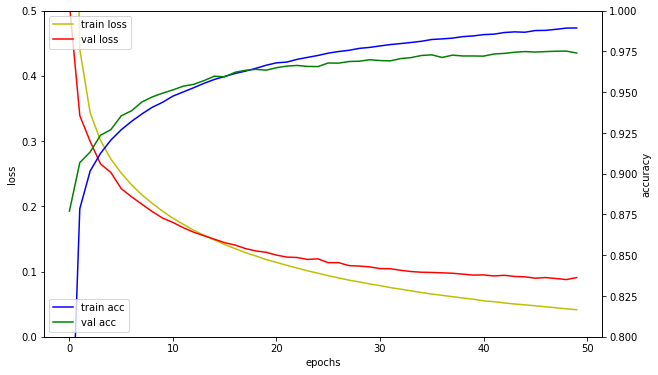

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = (10, 6)
fit, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(hist1.history['loss'], 'y', label='train loss')
loss_ax.plot(hist1.history['val_loss'], 'r', label='val loss')
loss_ax.set_ylim([0.0, 0.5])

acc_ax.plot(hist1.history['acc'], 'b', label='train acc')
acc_ax.plot(hist1.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylim([0.8, 1.0])

loss_ax.set_xlabel('epochs')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')
loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

### 모델 평가하기

In [12]:
loss_and_metrics = model1.evaluate(x_test, y_test, batch_size=100)
print('## evaluation loss and metrics ##')
print(loss_and_metrics)

10000/10000 [==============================] - 0s 17us/step
## evaluation loss and metrics ##
[0.08481356097763637, 0.9728000062704086]


### 모델 사용하기

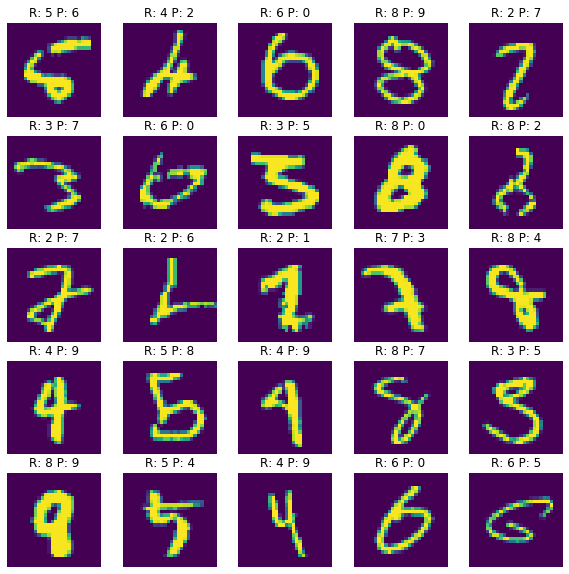

In [15]:
yhat_test = model1.predict(x_test, batch_size=100)

plt_row = 5
plt_col = 5
plt.rcParams['figure.figsize'] = (10, 10)

f, axarr = plt.subplots(plt_row, plt_col)
cnt = 0
i = 0
while cnt < (plt_row*plt_col):
    if np.argmax(y_test[i]) == np.argmax(yhat_test[i]):
        i += 1
        continue

    sub_plt = axarr[cnt//plt_row, cnt%plt_col]
    sub_plt.axis('off')
    sub_plt.imshow(x_test[i].reshape(width, height))
    sub_plt_title = 'R: ' + str(np.argmax(y_test[i])) + ' P: ' + str(np.argmax(yhat_test[i]))   
    sub_plt.set_title(sub_plt_title)
    
    i += 1
    cnt += 1
    
plt.show()

## 2. 컨볼루션 신경망 모델

In [16]:
from keras.layers import Conv2D, MaxPooling2D, Flatten

### 데이터셋 준비

In [17]:
# 훈련셋과 테스트셋 불러오기
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32') / 255.0
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32') / 255.0

In [18]:
# 훈련셋과 검증셋 분리
x_val = x_train[50000:]
y_val = y_train[50000:]
x_train = x_train[:50000]
y_train = y_train[:50000]

In [19]:
# 데이터셋 전처리: One-hot Encoding
y_train = np_utils.to_categorical(y_train)
y_val = np_utils.to_categorical(y_val)
y_test = np_utils.to_categorical(y_test)

### 모델 처리

In [21]:
model2 = Sequential()
model2.add(Conv2D(32, (3, 3), activation='relu', input_shape=(width, height, 1)))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Conv2D(32, (3, 3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Flatten())
model2.add(Dense(256, activation='relu'))
model2.add(Dense(10, activation='softmax'))
model2.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 256)               205056    
_________________________________________________________________
dense_12 (Dense)             (None, 10)               

In [22]:
model2.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [23]:
hist2 = model2.fit(x_train, y_train, epochs=50, batch_size=100, validation_data=(x_val, y_val))

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 6s 126us/step - loss: 1.2424 - acc: 0.6402 - val_loss: 0.3738 - val_acc: 0.8893
Epoch 2/50
50000/50000 [==============================] - 5s 103us/step - loss: 0.3389 - acc: 0.8972 - val_loss: 0.2451 - val_acc: 0.9281
Epoch 3/50
50000/50000 [==============================] - 5s 103us/step - loss: 0.2449 - acc: 0.9252 - val_loss: 0.1864 - val_acc: 0.9496
Epoch 4/50
50000/50000 [==============================] - 5s 106us/step - loss: 0.1908 - acc: 0.9425 - val_loss: 0.1527 - val_acc: 0.9587
Epoch 5/50
50000/50000 [==============================] - 8s 157us/step - loss: 0.1591 - acc: 0.9521 - val_loss: 0.1354 - val_acc: 0.9623
Epoch 6/50
50000/50000 [==============================] - 12s 235us/step - loss: 0.1358 - acc: 0.9589 - val_loss: 0.1198 - val_acc: 0.9667
Epoch 7/50
50000/50000 [==============================] - 8s 153us/step - loss: 0.1194 - acc: 0.9633 - val_loss: 0.1068 -

### 학습과정 살펴보기

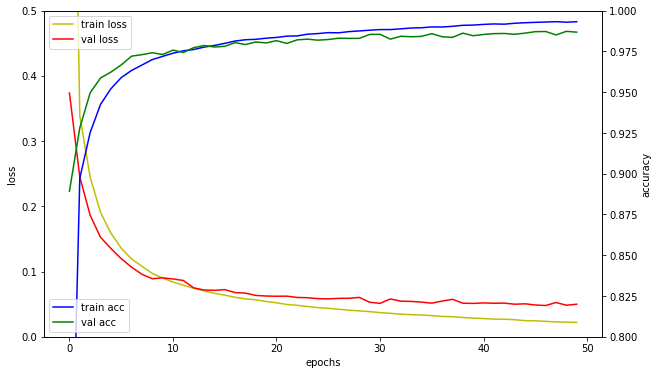

In [24]:
plt.rcParams['figure.figsize'] = (10, 6)
fit, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(hist2.history['loss'], 'y', label='train loss')
loss_ax.plot(hist2.history['val_loss'], 'r', label='val loss')
loss_ax.set_ylim([0.0, 0.5])

acc_ax.plot(hist2.history['acc'], 'b', label='train acc')
acc_ax.plot(hist2.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylim([0.8, 1.0])

loss_ax.set_xlabel('epochs')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')
loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

### 모델 평가하기

In [25]:
loss_and_metrics = model2.evaluate(x_test, y_test, batch_size=100)
print('## evaluation loss and metrics ##')
print(loss_and_metrics)

10000/10000 [==============================] - 0s 39us/step
## evaluation loss and metrics ##
[0.03878633657197497, 0.9875000059604645]


### 모델 사용하기

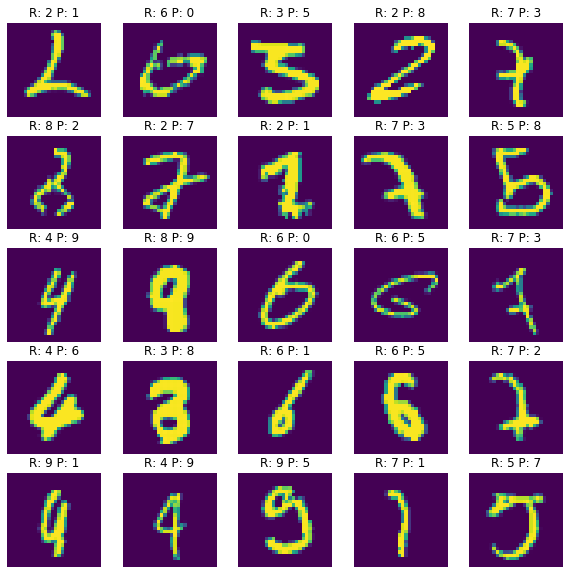

In [26]:
yhat_test = model2.predict(x_test, batch_size=100)

plt.rcParams['figure.figsize'] = (10, 10)

f, axarr = plt.subplots(plt_row, plt_col)
cnt = 0
i = 0
while cnt < (plt_row*plt_col):
    if np.argmax(y_test[i]) == np.argmax(yhat_test[i]):
        i += 1
        continue

    sub_plt = axarr[cnt//plt_row, cnt%plt_col]
    sub_plt.axis('off')
    sub_plt.imshow(x_test[i].reshape(width, height))
    sub_plt_title = 'R: ' + str(np.argmax(y_test[i])) + ' P: ' + str(np.argmax(yhat_test[i]))   
    sub_plt.set_title(sub_plt_title)
    
    i += 1
    cnt += 1
    
plt.show()

## 3. 깊은 컨볼루션 신경망 모델

In [27]:
from keras.layers import Dropout

### 모델 처리

In [28]:
model3 = Sequential()
model3.add(Conv2D(32, (3, 3), activation='relu', input_shape=(width, height, 1)))
model3.add(Conv2D(32, (3, 3), activation='relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(0.25))
model3.add(Conv2D(64, (3, 3), activation='relu'))
model3.add(Conv2D(64, (3, 3), activation='relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(0.25))
model3.add(Flatten())
model3.add(Dense(256, activation='relu'))
model3.add(Dropout(0.5))
model3.add(Dense(10, activation='softmax'))
model3.summary()

W0909 17:51:28.794795 14672 deprecation.py:506] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3733: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 10, 10, 64)        18496     
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 8, 8, 64)          36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 4, 4, 64)         

In [29]:
model3.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [30]:
hist3 = model3.fit(x_train, y_train, epochs=50, batch_size=100, validation_data=(x_val, y_val))

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 12s 236us/step - loss: 1.5726 - acc: 0.4487 - val_loss: 0.3671 - val_acc: 0.9036- loss: 1.5900 - acc: 0.
Epoch 2/50
50000/50000 [==============================] - 39s 775us/step - loss: 0.5079 - acc: 0.8397 - val_loss: 0.1999 - val_acc: 0.9436
Epoch 3/50
50000/50000 [==============================] - 55s 1ms/step - loss: 0.3498 - acc: 0.8919 - val_loss: 0.1519 - val_acc: 0.9573
Epoch 4/50
50000/50000 [==============================] - 55s 1ms/step - loss: 0.2802 - acc: 0.9138 - val_loss: 0.1280 - val_acc: 0.9624
Epoch 5/50
50000/50000 [==============================] - 55s 1ms/step - loss: 0.2389 - acc: 0.9264 - val_loss: 0.1121 - val_acc: 0.9671
Epoch 6/50
50000/50000 [==============================] - 55s 1ms/step - loss: 0.2123 - acc: 0.9351 - val_loss: 0.0986 - val_acc: 0.9709
Epoch 7/50
50000/50000 [==============================] - 55s 1ms/step - loss: 0.1908 - acc: 0.9410 

### 학습과정 살펴보기

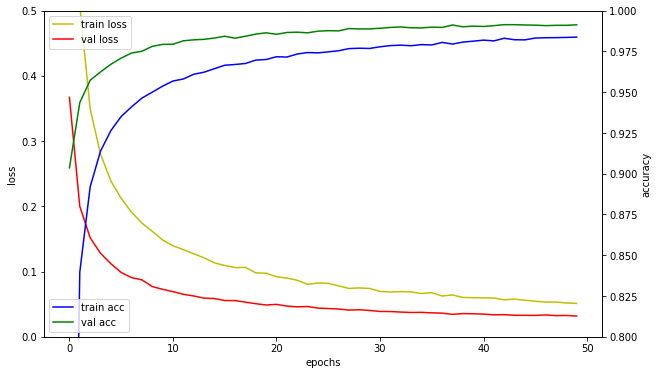

In [31]:
plt.rcParams['figure.figsize'] = (10, 6)
fit, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(hist3.history['loss'], 'y', label='train loss')
loss_ax.plot(hist3.history['val_loss'], 'r', label='val loss')
loss_ax.set_ylim([0.0, 0.5])

acc_ax.plot(hist3.history['acc'], 'b', label='train acc')
acc_ax.plot(hist3.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylim([0.8, 1.0])

loss_ax.set_xlabel('epochs')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')
loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

### 모델 평가하기

In [32]:
loss_and_metrics = model3.evaluate(x_test, y_test, batch_size=100)
print('## evaluation loss and metrics ##')
print(loss_and_metrics)

10000/10000 [==============================] - 1s 70us/step
## evaluation loss and metrics ##
[0.02470122101938614, 0.99230000436306]


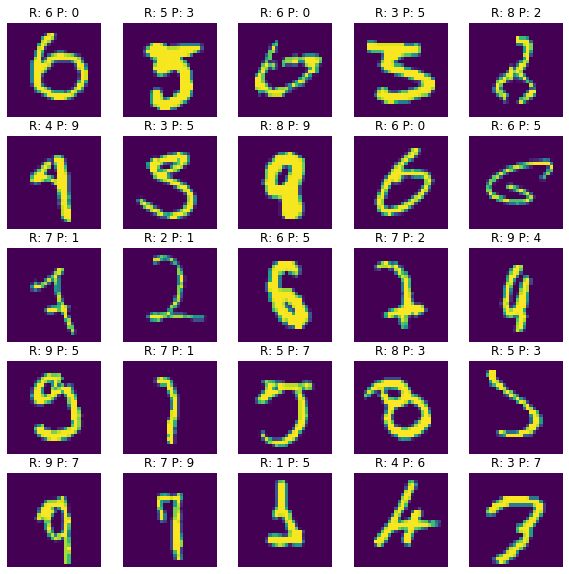

In [33]:
yhat_test = model3.predict(x_test, batch_size=100)

plt.rcParams['figure.figsize'] = (10, 10)

f, axarr = plt.subplots(plt_row, plt_col)
cnt = 0
i = 0
while cnt < (plt_row*plt_col):
    if np.argmax(y_test[i]) == np.argmax(yhat_test[i]):
        i += 1
        continue

    sub_plt = axarr[cnt//plt_row, cnt%plt_col]
    sub_plt.axis('off')
    sub_plt.imshow(x_test[i].reshape(width, height))
    sub_plt_title = 'R: ' + str(np.argmax(y_test[i])) + ' P: ' + str(np.argmax(yhat_test[i]))   
    sub_plt.set_title(sub_plt_title)
    
    i += 1
    cnt += 1
    
plt.show()